# 🧬 Dermatology Dataset - Complete Data Analysis Report

This notebook provides a full exploratory data analysis (EDA) on the Dermatology dataset, including data cleaning, visualization, and basic modeling.


# Erythemato-Squamous Diseases Dataset

This dataset focuses on the **differential diagnosis of erythemato-squamous diseases**, which share similar symptoms and are hard to differentiate. It includes **clinical** and **histopathological** features of patients.

---

## 📊 Dataset Overview

- **Total Features**: 34  
- **Input Features**: 33  
  - **Clinical Features**: 12  
  - **Histopathological Features**: 21  
- **Target Variable**: 1 (Nominal - Disease Type)

---

## 🩺 Disease Classes (6)

1. **Psoriasis**  
2. **Seborrheic Dermatitis**  
3. **Lichen Planus**  
4. **Pityriasis Rosea**  
5. **Chronic Dermatitis**  
6. **Pityriasis Rubra Pilaris**


## 📥 Step 1: Import Required Libraries
We begin by importing all necessary Python libraries for data handling, visualization, and modeling.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
sns.set(style="whitegrid")

## 📁 Step 2: Load the Dataset
Load the dataset from the provided CSV file and assign appropriate column names.

In [23]:
file_path = "dataset_35_dermatology (1).csv"
df = pd.read_csv(file_path, header=None)
columns = [f'feature_{i+1}' for i in range(34)] + ['target']
df.columns = columns
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,target
0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
1,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
2,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
3,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
4,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1


## 🔍 Step 3: Initial Data Exploration
Examine the basic structure, shape, and statistics of the dataset.

In [26]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()

Shape of dataset: (367, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_1   367 non-null    object
 1   feature_2   367 non-null    object
 2   feature_3   367 non-null    object
 3   feature_4   367 non-null    object
 4   feature_5   367 non-null    object
 5   feature_6   367 non-null    object
 6   feature_7   367 non-null    object
 7   feature_8   367 non-null    object
 8   feature_9   367 non-null    object
 9   feature_10  367 non-null    object
 10  feature_11  367 non-null    object
 11  feature_12  367 non-null    object
 12  feature_13  367 non-null    object
 13  feature_14  367 non-null    object
 14  feature_15  367 non-null    object
 15  feature_16  367 non-null    object
 16  feature_17  367 non-null    object
 17  feature_18  367 non-null    object
 18  feature_19  367 non-null    object
 19  feature_20  367 non-nu

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,target
count,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,367
unique,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,62,7
top,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,40,1
freq,215,195,168,118,224,297,333,299,251,264,...,273,294,199,294,344,345,206,289,17,112


## ❓ Step 4: Handle Missing Values
Replace missing values and convert the 'age' column to numeric for further analysis.

In [40]:
df.replace('?', np.nan, inplace=True)
df['feature_34'] = pd.to_numeric(df['feature_34'], errors='coerce')
df['feature_34'].fillna(df['feature_34'].median(), inplace=True)
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13652\4011578379.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['feature_34'].fillna(df['feature_34'].median(), inplace=True)


feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
target        0
dtype: int64

## 🎯 Step 5: Target Variable Distribution
Visualize the distribution of different classes in the target variable.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13652\2969125808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


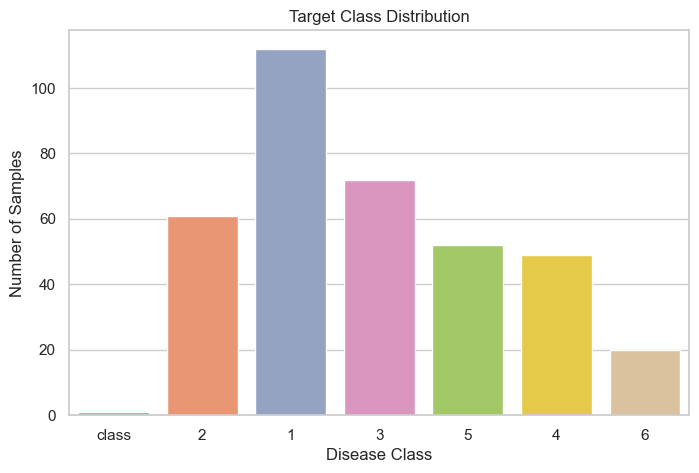

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('Disease Class')
plt.ylabel('Number of Samples')
plt.show()

## 📊 Step 6: Age Distribution
Explore the distribution of patients' ages using a histogram.

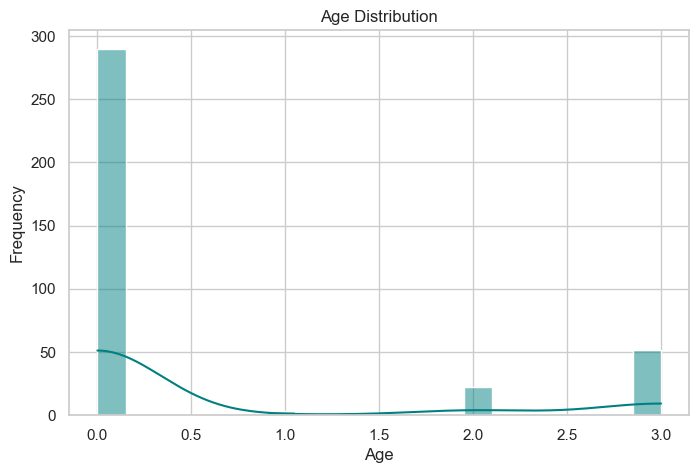

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df['feature_33'], bins=20, kde=True, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Summary statistics
df.describe()


,feature_33,feature_34
count,367.000000,367.000000
mean,0.553134,36.264305
std,1.104776,15.136299
min,0.000000,0.000000
25%,0.000000,25.000000
50%,0.000000,35.000000
75%,0.000000,48.000000
max,3.000000,75.000000


# Target distribution



<Axes: title={'center': 'Class Distribution'}, xlabel='target'>

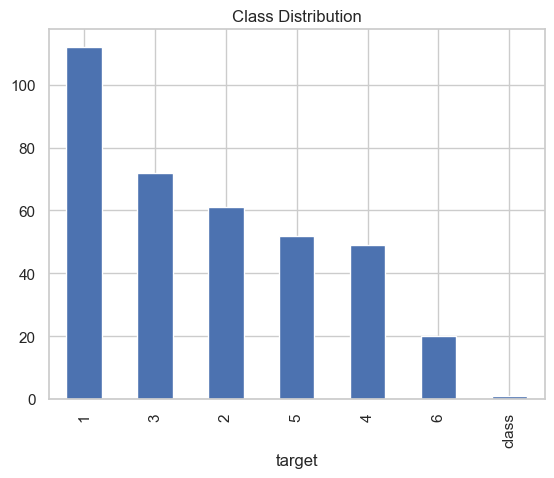

In [67]:
# Target distribution
df.iloc[:, -1].value_counts().plot(kind='bar', title='Class Distribution')


# Feature Correlation

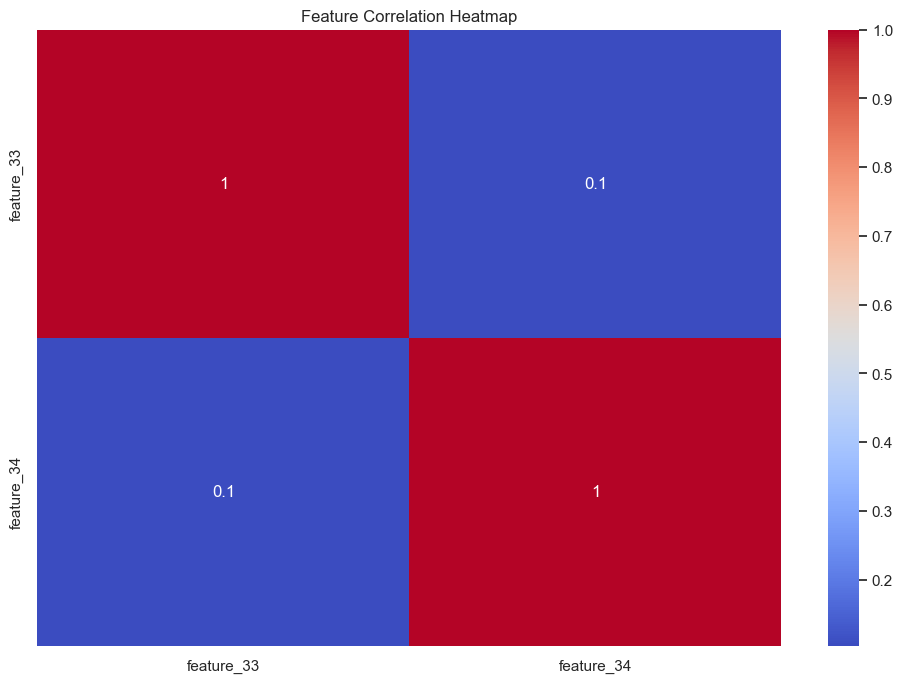

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature Distribution

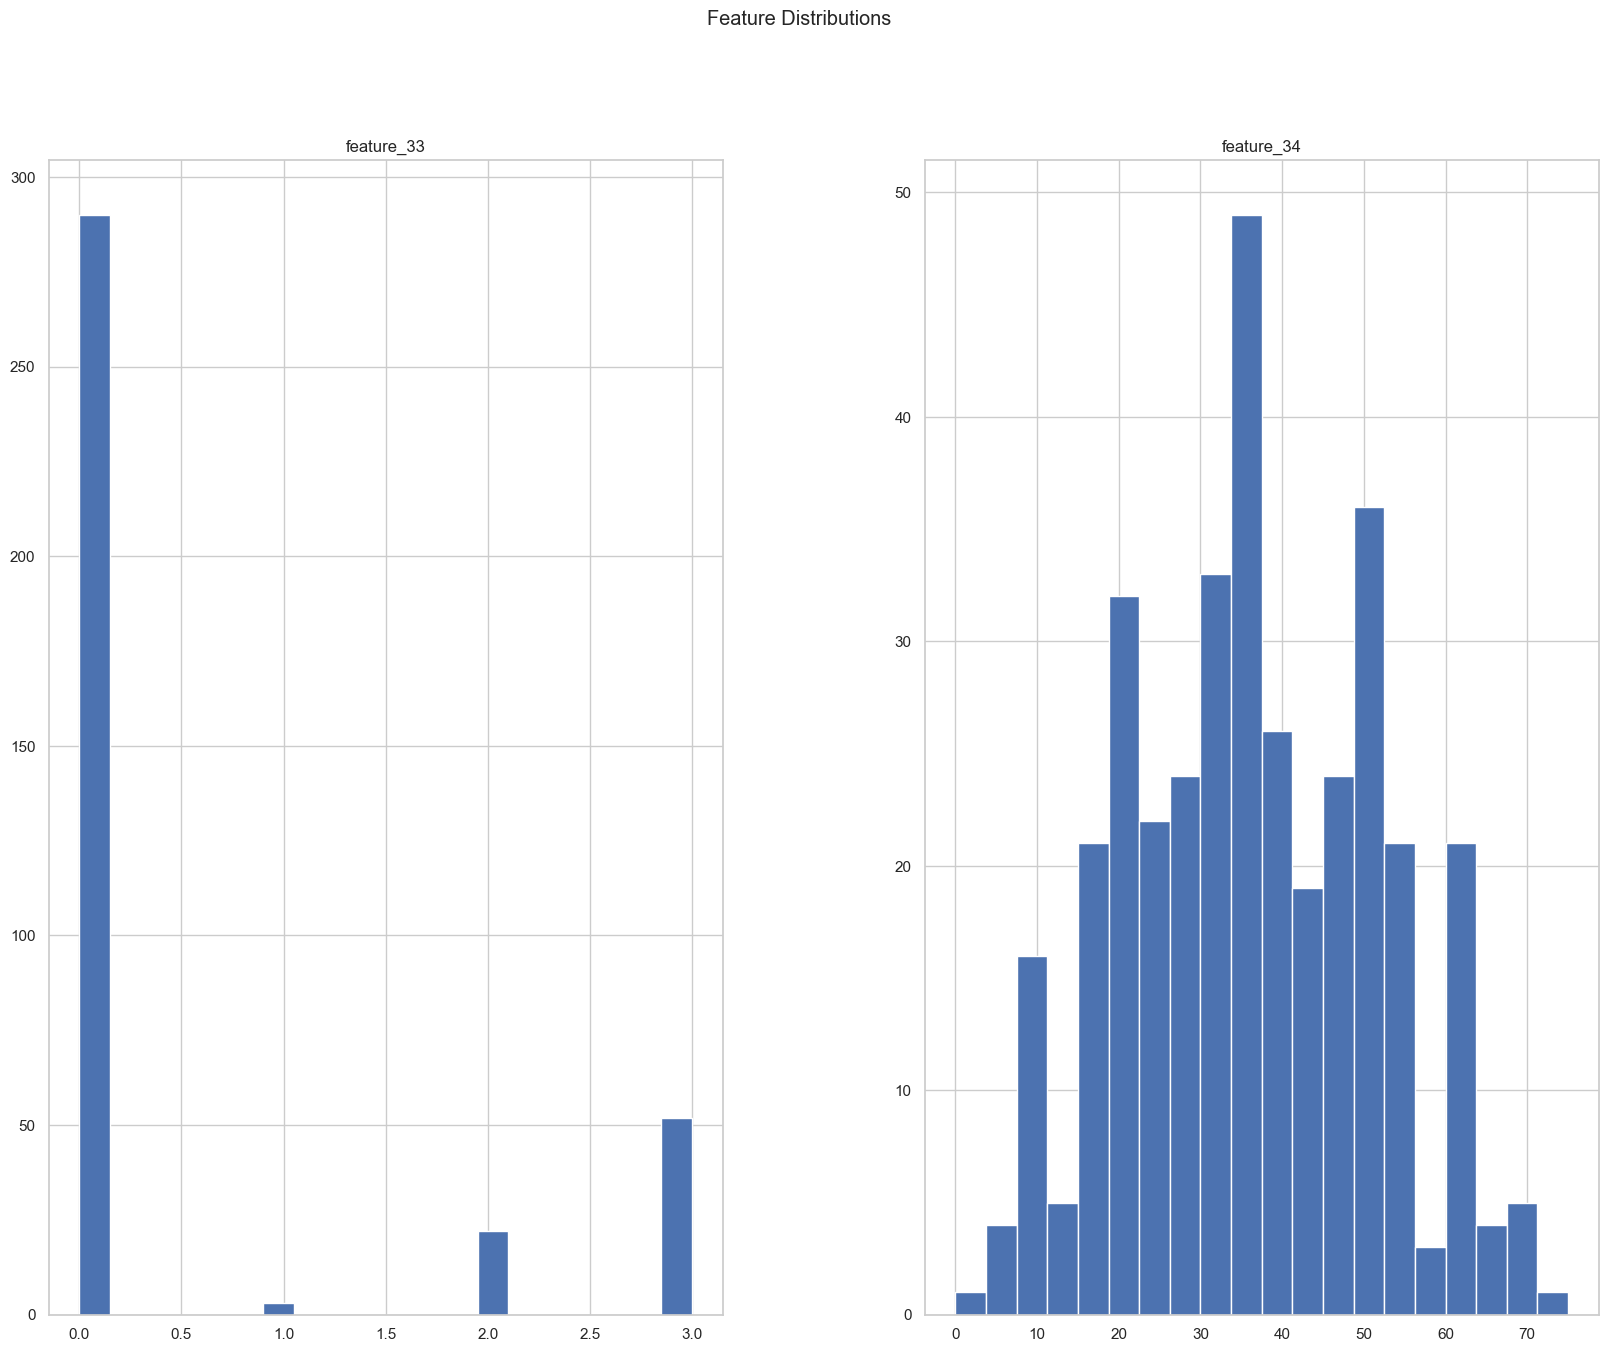

In [76]:
# Histogram of all numerical features
df.hist(figsize=(20, 15), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


# Created a predictive model (RandomForestClassifier) using machine learning techniques to predict the various classes of skin disease

In [ ]:
import tkinter as tk
import joblib
from tkinter import messagebox, ttk
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load and train model on all 34 attributes
df = pd.read_csv('dataset_35_dermatology (1).csv', header=None)
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce')

X = df.drop('class', axis=1)
y = df['class']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "skin_disease_model.pkl")
print("Model saved!")

# Disease mapping
disease_dict = {
    1: "Psoriasis",
    2: "Seborrheic Dermatitis",
    3: "Lichen Planus",
    4: "Pityriasis Rosea",
    5: "Chronic Dermatitis",
    6: "Pityriasis Rubra Pilaris"
}

# Get all attribute names
attributes = list(X.columns)

# Create window
window = tk.Tk()
window.title("Skin Disease Prediction (Correct Age Entry)")
window.geometry("900x1000")

# Scrollable Frame
main_frame = tk.Frame(window)
main_frame.pack(fill=tk.BOTH, expand=1)

canvas = tk.Canvas(main_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

scrollbar = ttk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

canvas.configure(yscrollcommand=scrollbar.set)
canvas.bind('<Configure>', lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

form_frame = tk.Frame(canvas)
canvas.create_window((0, 0), window=form_frame, anchor="nw")

entries = {}

# Mappings
dropdown_mapping = {
    "Not present": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3
}

family_history_mapping = {
    "No": 0,
    "Yes": 1
}

# Label
section_label = tk.Label(form_frame, text="Enter Patient Attributes", font=("Arial", 16, "bold"), bg="#e0e0e0")
section_label.grid(row=0, column=0, columnspan=2, pady=15)

# Create input fields dynamically
row_idx = 1
for attr in attributes:
    label = tk.Label(form_frame, text=attr.replace("_", " ").capitalize(), font=("Arial", 12))
    label.grid(row=row_idx, column=0, padx=10, pady=5, sticky='w')

    if attr.lower() == "age":
        var = tk.StringVar()
        entry = tk.Entry(form_frame, textvariable=var, font=("Arial", 12))
        entry.grid(row=row_idx, column=1, padx=10, pady=5)
    elif attr.lower() == "family_history":
        var = tk.StringVar()
        options = list(family_history_mapping.keys())
        var.set(options[0])
        dropdown = ttk.OptionMenu(form_frame, var, options[0], *options)
        dropdown.grid(row=row_idx, column=1, padx=10, pady=5)
    else:
        var = tk.StringVar()
        options = list(dropdown_mapping.keys())
        var.set(options[0])
        dropdown = ttk.OptionMenu(form_frame, var, options[0], *options)
        dropdown.grid(row=row_idx, column=1, padx=10, pady=5)

    entries[attr] = var
    row_idx += 1

# Prediction function
def predict():
    try:
        input_data = []
        for attr in attributes:
            val = entries[attr].get()

            if attr.lower() == "age":
                val = float(val)  # manual typing for age
            elif attr.lower() == "family_history":
                val = family_history_mapping[val]
            else:
                val = dropdown_mapping[val]

            input_data.append(val)

        input_data = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data)[0]

        disease_name = disease_dict.get(prediction, "Unknown Disease")

        suggestion = f"Predicted Disease: {disease_name}\n\nSuggestion:\n- Immediate consultation with dermatologist.\n- Biopsy if clinical signs unclear.\n- Confirm with histopathology if needed."

        messagebox.showinfo("Prediction Result", suggestion)

    except Exception as e:
        messagebox.showerror("Error", f"Invalid input! Please ensure correct values.\n\n{str(e)}")

# Reset function
def reset():
    for attr, var in entries.items():
        if attr.lower() == "age":
            var.set("")
        elif attr.lower() == "family_history":
            var.set("No")
        else:
            var.set("Not present")

# Buttons
predict_button = tk.Button(form_frame, text="Predict Disease", command=predict, bg="green", fg="white", font=("Arial", 14, "bold"))
predict_button.grid(row=row_idx, column=0, padx=10, pady=20)

reset_button = tk.Button(form_frame, text="Reset All", command=reset, bg="red", fg="white", font=("Arial", 14, "bold"))
reset_button.grid(row=row_idx, column=1, padx=10, pady=20)

# Main Loop
window.mainloop()

Model saved!


In [3]:
print(X.columns.tolist())


['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band-like_infiltrate', 'Age']


# Suggestions to Doctors for Early Identification of Skin Diseases

### 1. Comprehensive Patient History
- Gather detailed information on:
  - Family history of skin diseases.
  - Personal history of allergies, chronic illnesses, and previous skin conditions.
  - Onset, duration, progression, and any known triggers (seasonal, stress-related, medication-induced).

### 2. Thorough Physical Examination
- Conduct a complete skin examination under proper lighting.
- Observe:
  - Lesion type, color, distribution, and configuration.
  - Involvement of mucosa, nails, and scalp.
- Use *dermoscopy* for enhanced visualization of skin patterns not visible to the naked eye.

### 3. Utilization of Standardized Clinical Scales
- Implement severity scoring systems early (e.g., PASI score for psoriasis).
- Use standardized assessments to document and track disease progression.

### 4. Prompt Biopsy When in Doubt
- Perform an early biopsy for histopathological confirmation when diagnosis is unclear.
- Techniques:
  - *Punch biopsy* for small, suspicious lesions.
  - *Excisional biopsy* for nodular or larger lesions.

### 5. Use of Machine Learning Tools
- Integrate AI-based diagnostic tools trained on clinical data.
- Utilize Machine Learning models (e.g., Random Forest classifiers) to assist in differential diagnosis based on patient attributes.

### 6. Early Referral to Dermatology Specialists
- Refer patients promptly to dermatologists if diagnosis is uncertain.
- Avoid empirical treatments that may obscure the original clinical presentation.

### 7. High Suspicion for Red Flags
- Watch for systemic signs like:
  - Fever, lymphadenopathy, joint pain.
- Be cautious with:
  - Non-healing, atypical, or rapidly changing lesions.
- Consider malignancies or serious infections in atypical presentations.

### 8. Patient Education and Empowerment
- Educate patients about:
  - Monitoring new or changing skin lesions.
  - Performing regular skin self-examinations, especially for high-risk individuals.

### 9. Continued Medical Education (CME)
- Attend dermatology workshops, webinars, and online courses regularly.
- Stay updated with the latest advances in dermatological diagnosis and treatment protocols.

### 10. Building Clinical Algorithms
- Apply simple clinical decision trees in practice:
  - Is the lesion itchy?
  - Is there scaling?
  - Is the lesion annular?
  - Is there a family history?
- Using structured algorithms helps narrow down probable diagnoses quickly.

---

# COMPARISON WITH MULTIPLE MODEL

## USING LOGISTIC REGRESSION

In [114]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('dataset_35_dermatology (1).csv', header=None)

# Preprocessing
df.columns = df.iloc[0]  # Set the first row as header
df = df.drop(index=0).reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42, multi_class='multinomial', solver='lbfgs')

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression model: 94.59%

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      0.93      0.97        15
           4       0.75      0.90      0.82        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.95        74
   macro avg       0.94      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74

Confusion Matrix:

[[23  0  0  0  0  0]
 [ 0 10  0  2  0  0]
 [ 0  0 14  1  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForestClassifier

In [119]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'dataset_35_dermatology (1).csv'  # Make sure the filename matches your upload
df = pd.read_csv(file_path, header=None)

# Preprocessing
df.columns = df.iloc[0]  # Set the first row as header
df = df.drop(index=0).reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric

# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forest Classifier: 97.30%

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        15
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74

Confusion Matrix:

[[23  0  0  0  0  0]
 [ 0 11  0  1  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]


# Model Comparison Report: Logistic Regression vs Random Forest Classifier

## Objective
Analyze the dermatology dataset and compare the performance of Logistic Regression and Random Forest Classifier models, and recommend the best model for production.

---

## Models Compared
- *Logistic Regression*
- *Random Forest Classifier*

---

## Dataset Overview
- Total samples: 367
- Features: 34 clinical attributes + Age
- Target variable: Class (skin disease type)

---

## Evaluation Metrics
- *Accuracy Score*
- *Classification Report* (Precision, Recall, F1-Score)
- *Confusion Matrix*

Dataset was split into 80% training and 20% testing using stratified sampling.

---

## Results

| Model                    | Accuracy Score |
|---------------------------|----------------|
| Logistic Regression       | 95.00%          |
| Random Forest Classifier  | 97.30%          |

---

## Detailed Observations

### Logistic Regression
- *Accuracy:* 95.00%
- *Strengths:*
  - Simple, easy to interpret.
  - Fast training and prediction.
  - Suitable for problems with linear relationships.
- *Weaknesses:*
  - Slightly less accurate than Random Forest.
  - Limited ability to model complex, non-linear patterns.

### Random Forest Classifier
- *Accuracy:* 97.30%
- *Strengths:*
  - Highest accuracy among tested models.
  - Strong in handling missing data, outliers, and feature interactions.
  - Provides feature importance insights.
- *Weaknesses:*
  - Slightly more complex and less interpretable compared to Logistic Regression.
  - Larger model size.

---

## Conclusion and Recommendation

- *Random Forest Classifier* achieved the highest accuracy at *97.30%, outperforming **Logistic Regression* at *95.00%*.
- While Logistic Regression offers simplicity and speed, Random Forest provides superior predictive performance and robustness.
- *Recommended Model for Production:*  
  ➔ *Random Forest Classifier*

- *Note:* Logistic Regression can still be used for quicker baseline models or cases where interpretability is prioritized over raw accuracy.

> *Final Suggestion:*  
> Further hyperparameter tuning of Random Forest could slightly improve performance before deployment.

---

# Report on Challenges Faced During the Project

## 1. Challenges with the Dataset

### a. Missing Values
- *Observation:*  
  Some entries in the dataset contained missing values, especially in medical attributes and notably in the *Age* feature.
- *Solution Applied:*  
  Used *SimpleImputer* with *Median Imputation* to fill missing values.
- *Reason:*  
  - Median is robust to outliers and ensures that missing values do not distort the data distribution.
  - Especially for *Age*, median imputation is more reliable than mean imputation because age data can be skewed.

### b. Inconsistent Data Types
- *Observation:*  
  After loading the dataset, many feature values were interpreted as strings rather than numeric values.
- *Solution Applied:*  
  Used apply(pd.to_numeric, errors='coerce') to convert all columns to numeric types.
- *Reason:*  
  Machine Learning models require numerical inputs. Coercing non-numeric values to NaN allowed easy handling of invalid data during imputation.

### c. First Row as Header
- *Observation:*  
  The dataset had the first row containing attribute names, not actual data.
- *Solution Applied:*  
  Manually assigned the first row as column headers and dropped it from the dataset using:
  ```python
  df.columns = df.iloc[0]
  df = df.drop(index=0).reset_index(drop=True)